In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import csv

In [116]:
# This is an analysis of trafic accident data - with respect to Age.
# First import CSV files 

person_path='project_data/person_df.csv'

In [117]:
# Read CSV file

person_df = pd.read_csv(person_path)

C:\Users\MOHAMMED\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (7,10,14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [118]:
# Simplify the person's dataframe to Age, Type of road user i.e Driver or Passenger
# or Pedestrian or Motorcyclist etc. and injury level

age_df = person_df[["ACCIDENT_NO", "AGE","ROAD_USER_TYPE","INJ_LEVEL"]]
age_df

,ACCIDENT_NO,AGE,ROAD_USER_TYPE,INJ_LEVEL
0,T20160000013,49.0,1,2
1,T20160000013,49.0,4,4
2,T20160000015,23.0,2,2
3,T20160000019,38.0,2,3
4,T20160000028,23.0,2,3
...,...,...,...,...
148368,T20200019247,21.0,2,2
148369,T20200019250,45.0,2,4
148370,T20200019250,56.0,4,2
148371,T20200019253,65.0,4,2


In [119]:
# Select type 2 user, which are the drivers of the vehicles in accidents

drivers_df=age_df[age_df['ROAD_USER_TYPE']==2]
drivers_df

,ACCIDENT_NO,AGE,ROAD_USER_TYPE,INJ_LEVEL
2,T20160000015,23.0,2,2
3,T20160000019,38.0,2,3
4,T20160000028,23.0,2,3
5,T20160000028,25.0,2,4
8,T20160000033,79.0,2,2
...,...,...,...,...
148361,T20200019195,40.0,2,4
148365,T20200019239,31.0,2,4
148368,T20200019247,21.0,2,2
148369,T20200019250,45.0,2,4


In [126]:
# Select the Severity of the injury - 1 being death and 2 being serious injury and
# 3 being non-serious injury and 4 being no injury.

death_df=drivers_df[drivers_df['INJ_LEVEL']==1]
death_df

,ACCIDENT_NO,AGE,ROAD_USER_TYPE,INJ_LEVEL
65540,T20170021968,49.0,2,1
65617,T20170022040,66.0,2,1
66105,T20170022393,37.0,2,1
66217,T20170022473,50.0,2,1
66275,T20170022514,18.0,2,1
...,...,...,...,...
148144,T20200017372,46.0,2,1
148244,T20200018096,21.0,2,1
148281,T20200018319,87.0,2,1
148299,T20200018424,19.0,2,1


In [145]:
# Drivers count

x=[]
count=[]

for i in range(15,80,5):
        j=(2*i+5)/2
        x.append(j)
        z=drivers_df[drivers_df['AGE'].between(i,i+5)].count()['AGE']
        count.append(z)


print(x,count)

[17.5, 22.5, 27.5, 32.5, 37.5, 42.5, 47.5, 52.5, 57.5, 62.5, 67.5, 72.5, 77.5] [6839, 14505, 13556, 11907, 10388, 9458, 9149, 7852, 6866, 5444, 4198, 3137, 2268]


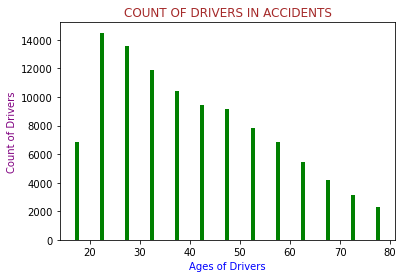

In [146]:
plt.bar(x,count,color='green')
plt.xlabel("Ages of Drivers",color='blue')
plt.ylabel("Count of Drivers",color='purple')
plt.title("COUNT OF DRIVERS IN ACCIDENTS",color='brown')

plt.show()

In [147]:
 # Fatality count

x1=[]
count1=[]

for i in range(15,80,5):
        j=(2*i+5)/2
        x1.append(j)
        z1=death_df[death_df['AGE'].between(i,i+5)].count()['AGE']
        count1.append(z1)


print(x1,count1)
# plt.bar(x1,count1)
# plt.show()

[17.5, 22.5, 27.5, 32.5, 37.5, 42.5, 47.5, 52.5, 57.5, 62.5, 67.5, 72.5, 77.5] [12, 20, 29, 26, 26, 15, 11, 13, 13, 13, 11, 12, 14]


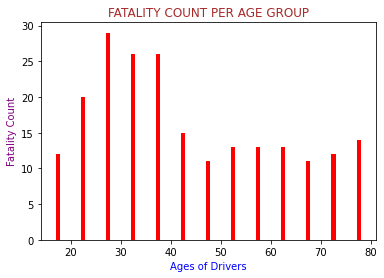

In [152]:
plt.bar(x1,count1,color='red')
plt.xlabel("Ages of Drivers",color='blue')
plt.ylabel("Fatality Count",color='purple')
plt.title("FATALITY COUNT PER AGE GROUP",color='brown')

plt.show()

In [138]:
# Actual impact of Age on Fatalities

count2=[]

for i in range(0,13):
    p=(count1[i]/count[i])*10000
    count2.append(p)
    
    
print(x1,count2) 


[17.5, 22.5, 27.5, 32.5, 37.5, 42.5, 47.5, 52.5, 57.5, 62.5, 67.5, 72.5, 77.5] [17.54642491592338, 13.788348845225784, 21.392741221599294, 21.83589485176787, 25.028879476318828, 15.859589765278072, 12.023171931358618, 16.556291390728475, 18.93387707544422, 23.87950036737693, 26.202953787517863, 38.25310806503028, 61.72839506172839]


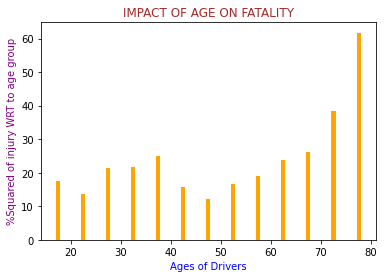

In [153]:
plt.bar(x1,count2,color='orange')
plt.xlabel("Ages of Drivers",color='blue')
plt.ylabel("%Squared of injury WRT to age group",color='purple')
plt.title("IMPACT OF AGE ON FATALITY",color='brown')

plt.show()

In [132]:
# Serious injury dataframe

seriousinjury_df=drivers_df[drivers_df['INJ_LEVEL']==2]
seriousinjury_df

,ACCIDENT_NO,AGE,ROAD_USER_TYPE,INJ_LEVEL
65538,T20170021958,22.0,2,2
65541,T20170021968,33.0,2,2
65542,T20170021970,20.0,2,2
65551,T20170021976,28.0,2,2
65605,T20170022029,28.0,2,2
...,...,...,...,...
148351,T20200018982,55.0,2,2
148354,T20200019031,62.0,2,2
148356,T20200019069,24.0,2,2
148368,T20200019247,21.0,2,2


In [149]:
# Serious Injury Count

x3=[]
count3=[]

for i in range(15,80,5):
        j=(2*i+5)/2
        x3.append(j)
        z2=seriousinjury_df[seriousinjury_df['AGE'].between(i,i+5)].count()['AGE']
        count3.append(z2)


print(x3,count3)
# plt.bar(x3,count3)
# plt.show()

[17.5, 22.5, 27.5, 32.5, 37.5, 42.5, 47.5, 52.5, 57.5, 62.5, 67.5, 72.5, 77.5] [306, 532, 448, 384, 297, 290, 308, 272, 260, 232, 210, 179, 160]


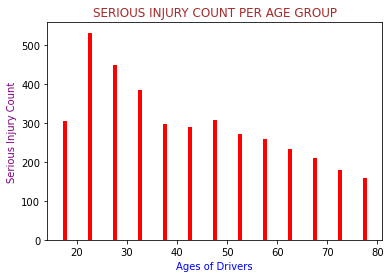

In [154]:
plt.bar(x3,count3,color='red')
plt.xlabel("Ages of Drivers",color='blue')
plt.ylabel("Serious Injury Count",color='purple')
plt.title("SERIOUS INJURY COUNT PER AGE GROUP",color='brown')

plt.show()

In [143]:
# Actual impact of Age on Serious Injuries

count4=[]

for i in range(0,13):
    p=(count3[i]/count[i])*10000
    count4.append(p)
    
    
print(x3,count4) 

[17.5, 22.5, 27.5, 32.5, 37.5, 42.5, 47.5, 52.5, 57.5, 62.5, 67.5, 72.5, 77.5] [447.4338353560462, 366.7700792830059, 330.4809678371201, 322.49937011841774, 285.90681555641123, 306.6187354620427, 336.6488140780413, 346.4085583290882, 378.67754150888436, 426.157237325496, 500.23820867079564, 570.608861970035, 705.4673721340388]


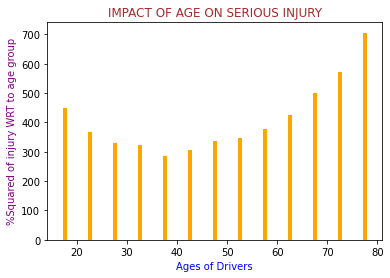

In [155]:
plt.bar(x3,count4,color='orange')
plt.xlabel("Ages of Drivers",color='blue')
plt.ylabel("%Squared of injury WRT to age group",color='purple')
plt.title("IMPACT OF AGE ON SERIOUS INJURY",color='brown')

plt.show()